# Context


#### *What is India VIX*?
* The Volatility Index measures the market's anticipation of volatility in the near term. 
- During moments of market volatility, the market typically moves sharply up or down, and the VIX tends to climb.

- VIX falls as volatility falls. It is not the same as a price index like the NIFTY. 
- The price index is calculated by taking the price movement of the underlying equities into account.


#### *Scope of analysis*?
We will focusing on movment Nifty impacted by IndiaVix rather than focusing on how it is being impacted by option price.

As we are concerned with view of a quarter

# What questions are we trying to answer?




- Understand relationship between Nifty price behaviour with volatilty index?

- Probablity of volatilty in nifty when Vix is at a particular point? Looking at historical data?


---
---
---
---

---
---
---
---

####  Pre-requiset Libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

# Sourcing Data

>Imported data from "investing.com" for educational purposes

#### Making copies of data for data safety

In [2]:
#vix data
data1 = pd.read_csv("Data/India VIX Historical Data.csv")
df1 = data1.copy()
df1.head(2)

,Date,vixPrice,vixOpen,vixHigh,vixLow,Vol.,vixChange%
0,08/27/2024,13.695,12.7100,14.0100,12.71,0.00K,-0.72%
1,08/26/2024,13.795,13.5525,13.9925,12.01,NaN,1.79%


In [3]:
# nifty50 data
data2 = pd.read_csv(r'Data/Nifty 50 Historical Data.csv')
df2 = data2.copy()
df2.head(2)

,Date,niftyPrice,niftyOpen,niftyHigh,niftyLow,Vol.,niftyChange %
0,08/27/2024,"25,017.75","25,024.80","25,073.10","24,973.65",223.35M,0.03%
1,08/26/2024,"25,010.60","24,906.10","25,043.80","24,874.70",210.27M,0.76%


In [4]:
#10-2yield
data3 = pd.read_csv(r'Data/10-2year.csv')
df3 = data3.copy()
df3.head(2)

,Date,T10Y2Y
0,2008-03-04,1.98
1,2008-03-05,2.04


In [5]:
# crudeoil
data4 = pd.read_csv(r'Data/Crudeoil.csv')
df4 = data4.copy()
df4.head(2)

,Date,CrudePrice,CrudeOpen,CrudeHigh,CrudeLow,Vol.,CrudeChange %
0,03/04/2008,99.52,102.35,103.33,98.87,366.72K,-2.86%
1,03/05/2008,104.52,99.88,104.95,99.55,414.31K,5.02%


In [6]:
# gold 
data5 = pd.read_csv(r'Data/Gold.csv')
df5 = data5.copy()
df5.head(2)

,Date,GoldPrice,GoldOpen,GoldHigh,GoldLow,Vol.,GoldChange %
0,27-08-2024,"2,529.30","2,530.50","2,537.70","2,515.40",7.27K,-0.08%
1,26-08-2024,"2,531.40","2,522.10","2,538.90","2,520.70",6.08K,0.35%


In [7]:
# usdinr
data6 = pd.read_csv(r'Data/usdinr.csv')
df6 = data6.copy()
df6.head(2)

,Date,inrPrice,inrOpen,inrHigh,inrLow,Vol.,inrChange %
0,08/27/2024,83.91,83.865,83.95,83.865,NaN,0.08%
1,08/26/2024,83.84,83.801,83.91,83.776,NaN,0.04%


In [8]:
# dollarindex
data7 = pd.read_csv(r'Data/USdollarindex.csv')
df7 = data7.copy()
df7.head(2)

,Date,diPrice,diOpen,diHigh,diLow,Vol.,diChange %
0,27-08-2024,100.55,100.82,100.93,100.51,NaN,-0.30%
1,26-08-2024,100.85,100.68,100.92,100.53,NaN,0.13%


In [9]:
# Rbiinterest rate
data8=pd.read_csv("Data/Rbiinterest.csv")
df8 = data8.copy()
df8.head(2)

,Date,Rbiinterest,Rbi%change
0,2008-06-12,8.0,0.00
1,2008-06-25,8.5,6.25


In [10]:

# Fedinterest rate
data9=pd.read_csv("Data/Fedinterest.csv")
df9 = data9.copy()
df9.head(2)

,Date,Fedinterest,Fed%change
0,2008-06-12,8.0,0.00
1,2008-06-25,8.5,6.25


In [11]:
# dollarindex
data10 = pd.read_csv(r'C:\Users\ALIE-n-WARE\Desktop\IndiaVIXanalysis\Data\Nifty 50 Historical Data.csv')
df10 = data10.copy()
df10.head(2)

,Date,niftyPrice,niftyOpen,niftyHigh,niftyLow,Vol.,niftyChange %
0,08/27/2024,"25,017.75","25,024.80","25,073.10","24,973.65",223.35M,0.03%
1,08/26/2024,"25,010.60","24,906.10","25,043.80","24,874.70",210.27M,0.76%


In [12]:
# USinflation
data11 = pd.read_csv(r'Data/USinflationdata.csv')
df11 = data11.copy()
df11.head(2)

,Date,USInflation Rate (%)
0,2008-03-01,7.7
1,2008-04-01,8.0


In [13]:
# indiainflation
data12 = pd.read_csv(r'Data/IndiaInflation.csv')
df12 = data12.copy()
df12.head(2)

,Date,IndiaInflationRate(%)
0,2008-03-01,7.9
1,2008-04-01,8.0


---

# Data PreProcessing

#### Correcting date format

In [14]:
# Convert 'date' columns to datetime if they are not already
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])
df5['Date'] = pd.to_datetime(df5['Date'])
df6['Date'] = pd.to_datetime(df6['Date'])
df7['Date'] = pd.to_datetime(df7['Date'])
df8['Date'] = pd.to_datetime(df8['Date'])
df9['Date'] = pd.to_datetime(df9['Date'])
df10['Date'] = pd.to_datetime(df10['Date'])
df11['Date'] = pd.to_datetime(df11['Date'])



C:\Users\ALIE-n-WARE\AppData\Local\Temp\ipykernel_16520\1722669401.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df5['Date'] = pd.to_datetime(df5['Date'])
C:\Users\ALIE-n-WARE\AppData\Local\Temp\ipykernel_16520\1722669401.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df7['Date'] = pd.to_datetime(df7['Date'])


#### Joining data

In [15]:
# Merge DataFrames on 'date'
niftyvix = pd.merge(df1, df2, on='Date', how='inner')

#### Renaming Column for readablity

In [16]:
niftyvix.head(1)

,Date,vixPrice,vixOpen,vixHigh,vixLow,Vol._x,vixChange%,niftyPrice,niftyOpen,niftyHigh,niftyLow,Vol._y,niftyChange %
0,2024-08-27,13.695,12.71,14.01,12.71,0.00K,-0.72%,"25,017.75","25,024.80","25,073.10","24,973.65",223.35M,0.03%


In [17]:
niftyvix = niftyvix.rename(columns={'Price_x': 'vclose', 'Open_x': 'vopen', 'High_x': 'vhigh','Low_x': 'vlow', 'Change %_x': 'vchange', 'Price_y': 'nclose', 'Open_y': 'nopen', 'High_y': 'nhigh', 'Low_y': 'nlow', 'Change %_y': 'nchange'})

In [18]:
niftyvix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4076 non-null   datetime64[ns]
 1   vixPrice       4076 non-null   float64       
 2   vixOpen        4076 non-null   float64       
 3   vixHigh        4076 non-null   float64       
 4   vixLow         4076 non-null   float64       
 5   Vol._x         2 non-null      object        
 6   vixChange%     4076 non-null   object        
 7   niftyPrice     4076 non-null   object        
 8   niftyOpen      4076 non-null   object        
 9   niftyHigh      4076 non-null   object        
 10  niftyLow       4076 non-null   object        
 11  Vol._y         4072 non-null   object        
 12  niftyChange %  4076 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 414.1+ KB


#### Values in **nchange** columns are **string**, we will change them to **float** 

In [19]:
niftyvix.head()

,Date,vixPrice,vixOpen,vixHigh,vixLow,Vol._x,vixChange%,niftyPrice,niftyOpen,niftyHigh,niftyLow,Vol._y,niftyChange %
0,2024-08-27,13.6950,12.7100,14.0100,12.7100,0.00K,-0.72%,"25,017.75","25,024.80","25,073.10","24,973.65",223.35M,0.03%
1,2024-08-26,13.7950,13.5525,13.9925,12.0100,NaN,1.79%,"25,010.60","24,906.10","25,043.80","24,874.70",210.27M,0.76%
2,2024-08-23,13.5525,13.0000,13.6200,10.8400,NaN,4.25%,"24,823.15","24,845.40","24,858.40","24,771.65",206.80M,0.05%
3,2024-08-22,13.0000,13.3325,13.7825,10.9575,NaN,-2.49%,"24,811.50","24,863.40","24,867.35","24,784.45",220.34M,0.17%
4,2024-08-21,13.3325,13.8200,14.0450,11.8225,NaN,-3.53%,"24,770.20","24,680.55","24,787.95","24,654.50",257.11M,0.29%


In [20]:
niftyvix.tail()

,Date,vixPrice,vixOpen,vixHigh,vixLow,Vol._x,vixChange%,niftyPrice,niftyOpen,niftyHigh,niftyLow,Vol._y,niftyChange %
4071,2008-03-11,32.69,30.72,37.54,29.75,NaN,0.34%,"4,865.90","4,796.30","4,888.50","4,732.85",158.76M,1.36%
4072,2008-03-10,32.58,25.33,47.95,25.33,NaN,-7.44%,"4,800.40","4,767.80","4,814.95","4,620.50",155.88M,0.60%
4073,2008-03-07,35.20,36.95,39.34,27.05,NaN,-0.87%,"4,771.60","4,918.30","4,918.30","4,672.25",145.78M,-3.04%
4074,2008-03-05,35.51,38.08,38.76,27.95,NaN,-6.75%,"4,921.40","4,866.85","4,936.75","4,847.25",114.72M,1.17%
4075,2008-03-04,38.08,38.08,51.07,30.59,NaN,6.49%,"4,864.25","4,958.55","4,976.70","4,812.95",150.84M,-1.79%


In [21]:
niftyvix['niftyChange %'].describe()

count       4076
unique       640
top       -0.10%
freq          31
Name: niftyChange %, dtype: object

In [22]:
niftyvix['niftyChange %'] = niftyvix['niftyChange %'].astype(str).str.rstrip('%').astype(float)
niftyvix['niftyChange %'].describe()

niftyvix['niftyChange %'].describe()

count    4076.000000
mean        0.047866
std         1.287635
min       -12.980000
25%        -0.520000
50%         0.070000
75%         0.660000
max        17.740000
Name: niftyChange %, dtype: float64

#### Values in **vixchange** columns are **string**, we will change them to **float**

In [23]:
niftyvix['vixChange%'].describe()

count      4076
unique     1723
top       0.00%
freq         26
Name: vixChange%, dtype: object

In [24]:
niftyvix['vixChange%'] = niftyvix['vixChange%'].str.rstrip('%').astype(float)
niftyvix['vixChange%'].describe()

count    4076.000000
mean        0.151452
std         6.027993
min       -37.510000
25%        -2.800000
50%        -0.240000
75%         2.600000
max        64.360000
Name: vixChange%, dtype: float64

#### Values in **niftyclose,niftyopen,niftyhigh** columns are **string**  and also have **","** between numerals, we will remove "," and  change them to **float**

In [25]:
niftyvix['niftyPrice'] = niftyvix['niftyPrice'].str.replace(',', '').astype(float)
niftyvix['niftyOpen'] = niftyvix['niftyOpen'].str.replace(',', '').astype(float)
niftyvix['niftyHigh'] = niftyvix['niftyHigh'].str.replace(',', '').astype(float)
niftyvix['niftyLow'] = niftyvix['niftyLow'].str.replace(',', '').astype(float)

niftyvix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4076 non-null   datetime64[ns]
 1   vixPrice       4076 non-null   float64       
 2   vixOpen        4076 non-null   float64       
 3   vixHigh        4076 non-null   float64       
 4   vixLow         4076 non-null   float64       
 5   Vol._x         2 non-null      object        
 6   vixChange%     4076 non-null   float64       
 7   niftyPrice     4076 non-null   float64       
 8   niftyOpen      4076 non-null   float64       
 9   niftyHigh      4076 non-null   float64       
 10  niftyLow       4076 non-null   float64       
 11  Vol._y         4072 non-null   object        
 12  niftyChange %  4076 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 414.1+ KB


In [26]:
niftyvix

,Date,vixPrice,vixOpen,vixHigh,vixLow,Vol._x,vixChange%,niftyPrice,niftyOpen,niftyHigh,niftyLow,Vol._y,niftyChange %
0,2024-08-27,13.6950,12.7100,14.0100,12.7100,0.00K,-0.72,25017.75,25024.80,25073.10,24973.65,223.35M,0.03
1,2024-08-26,13.7950,13.5525,13.9925,12.0100,NaN,1.79,25010.60,24906.10,25043.80,24874.70,210.27M,0.76
2,2024-08-23,13.5525,13.0000,13.6200,10.8400,NaN,4.25,24823.15,24845.40,24858.40,24771.65,206.80M,0.05
3,2024-08-22,13.0000,13.3325,13.7825,10.9575,NaN,-2.49,24811.50,24863.40,24867.35,24784.45,220.34M,0.17
4,2024-08-21,13.3325,13.8200,14.0450,11.8225,NaN,-3.53,24770.20,24680.55,24787.95,24654.50,257.11M,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,2008-03-11,32.6900,30.7200,37.5400,29.7500,NaN,0.34,4865.90,4796.30,4888.50,4732.85,158.76M,1.36
4072,2008-03-10,32.5800,25.3300,47.9500,25.3300,NaN,-7.44,4800.40,4767.80,4814.95,4620.50,155.88M,0.60
4073,2008-03-07,35.2000,36.9500,39.3400,27.0500,NaN,-0.87,4771.60,4918.30,4918.30,4672.25,145.78M,-3.04
4074,2008-03-05,35.5100,38.0800,38.7600,27.9500,NaN,-6.75,4921.40,4866.85,4936.75,4847.25,114.72M,1.17


#### we are droping  daily open, high and low data as well as we will be focusing close only

In [27]:
niftyvix=niftyvix.drop(['vixOpen','vixHigh','vixLow','niftyOpen','niftyHigh','niftyLow'],axis=1)

#### Droping Vol._x which is vix volume because there are is not enough data in the column

In [28]:
niftyvix['Vol._x'].isna().count()

4076

In [29]:
niftyvix=niftyvix.drop('Vol._x',axis=1)

In [30]:
niftyvix.head(1)

,Date,vixPrice,vixChange%,niftyPrice,Vol._y,niftyChange %
0,2024-08-27,13.695,-0.72,25017.75,223.35M,0.03


#### change Vol._y string values to float and correcting it for the values implied by M and K in the values and also removin the commas

> **UNDERSTANDING** : when making such changes to a column we write code from the perpective of making change to a single value, and that the iteration will take care of itself.

In [31]:
def convert_value(value):
    if isinstance(value, str):  # Ensure the value is a string
        # Remove commas for proper float conversion
        value = value.replace(',', '')
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        elif value.endswith('M'):
            return float(value[:-1]) * 1000000
        elif value.endswith('B'):
            return float(value[:-1]) * 1000000000
        else:
            return float(value)  # No suffix, just convert to float
    elif isinstance(value, (int, float)):  # Handle numeric values directly
        return float(value)
    else:
        raise ValueError(f"Unsupported value type: {type(value)}")


In [32]:
niftyvix['Vol._y'] = niftyvix['Vol._y'].apply(convert_value)

####  renaming 'Vol._y': 'nvol'for better understanding

In [33]:
niftyvix = niftyvix.rename(columns={'Vol._y': 'nvol'})


In [34]:
niftyvix['nvol'].mean()

266569599.70530453

In [35]:
niftyvix.describe()

,Date,vixPrice,vixChange%,niftyPrice,nvol,niftyChange %
count,4076,4076.000000,4076.000000,4076.000000,4.072000e+03,4076.000000
mean,2016-06-02 07:27:36.918547456,20.401995,0.151452,9916.414328,2.665696e+08,0.047866
min,2008-03-04 00:00:00,10.135000,-37.510000,2524.200000,2.770000e+06,-12.980000
25%,2012-04-19 18:00:00,14.534375,-2.800000,5599.325000,1.551825e+08,-0.520000
50%,2016-06-02 12:00:00,17.630000,-0.240000,8481.125000,2.142650e+08,0.070000
75%,2020-07-20 06:00:00,22.751875,2.600000,11925.750000,3.079300e+08,0.660000
max,2024-08-27 00:00:00,85.130000,64.360000,25017.750000,1.810000e+09,17.740000
std,NaN,9.248742,6.027993,5214.681473,1.724787e+08,1.287635


turning dataframe upside down as it was not in the direction when Tried to print the graph

In [36]:
niftyvix = niftyvix.iloc[::-1].reset_index(drop=True)

Let's make **Date** as axis and print the charts against it


In [37]:
niftyvix.set_index('Date', inplace=True)

In [38]:
# Add the index as a new column named 'Date' as the first column
niftyvix.insert(0, 'Date', niftyvix.index)

In [39]:
niftyvix.head()

,Date,vixPrice,vixChange%,niftyPrice,nvol,niftyChange %
Date,,,,,,
2008-03-04,2008-03-04,38.08,6.49,4864.25,150840000.0,-1.79
2008-03-05,2008-03-05,35.51,-6.75,4921.40,114720000.0,1.17
2008-03-07,2008-03-07,35.20,-0.87,4771.60,145780000.0,-3.04
2008-03-10,2008-03-10,32.58,-7.44,4800.40,155880000.0,0.60
2008-03-11,2008-03-11,32.69,0.34,4865.90,158760000.0,1.36


Printing all data for better understanding

<Axes: xlabel='Date'>

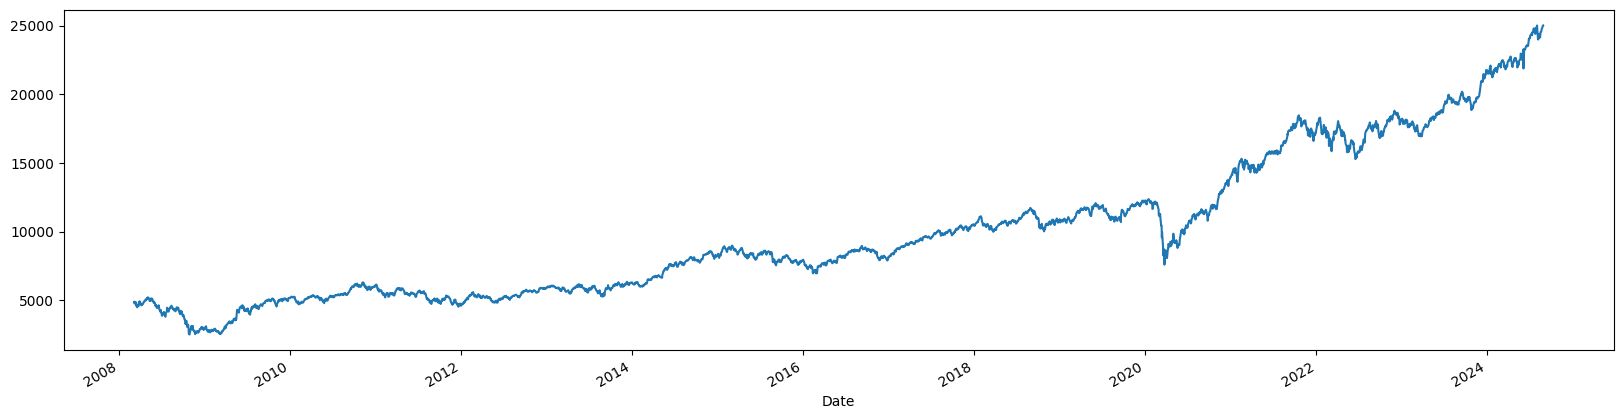

In [40]:
niftyvix['niftyPrice'].plot(figsize=(20,5))

<Axes: xlabel='Date'>

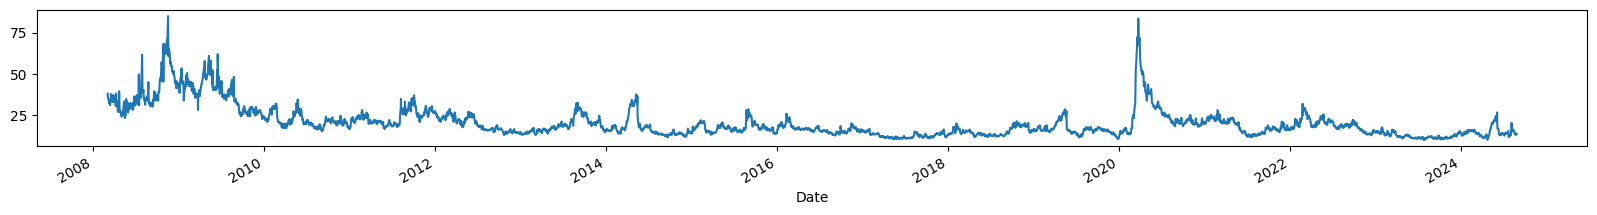

In [41]:
niftyvix['vixPrice'].plot(figsize=(20,2))

<Axes: xlabel='Date'>

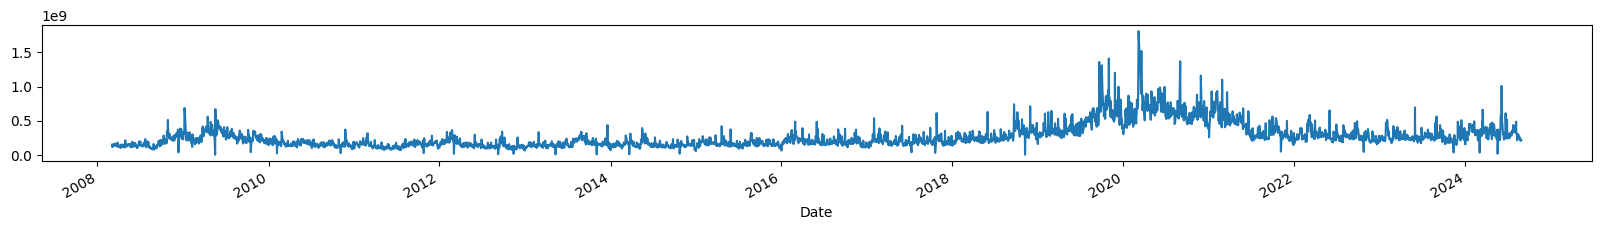

In [42]:
niftyvix['nvol'].plot(figsize=(20,2))

>We can observe looking at the chart that the volume data is flawed looking at the recent years so we will drop it from the dataframe.

In [43]:
niftyvix = niftyvix.drop("nvol", axis=1)
niftyvix.head(1)

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %
Date,,,,,
2008-03-04,2008-03-04,38.08,6.49,4864.25,-1.79


---
# Feature Engineering

## Creating columns to refer historical points, where the:
- nclose was:
    - 1 day
    - 5 days
    - 10 days
    - 20 days
    - 40 days
    - 60 days
    
- nchange was:
    - 1 day
    - 5 days
    - 10 days
    - 20 days
    - 40 days
    - 60 days

- vclose was:
    - 1 day
    - 5 days
    - 10 days
    - 20 days
    - 40 days
    - 60 days

- vchange was:
    - 1 day
    - 5 days
    - 10 days
    - 20 days
    - 40 days
    - 60 days

Adding columns of ***nclose***

In [44]:
niftyvix['n5day'] = niftyvix['niftyPrice'].shift(5)
niftyvix['n10day'] = niftyvix['niftyPrice'].shift(10)
niftyvix['n20day'] = niftyvix['niftyPrice'].shift(20)
niftyvix['n1day'] = niftyvix['niftyPrice'].shift(40)
niftyvix['n60day'] = niftyvix['niftyPrice'].shift(60)

Adding columns of ***nchange***

In [45]:
niftyvix['nc5day'] = niftyvix['niftyChange %'].shift(5)
niftyvix['nc10day'] = niftyvix['niftyChange %'].shift(10)
niftyvix['nc20day'] = niftyvix['niftyChange %'].shift(20)
niftyvix['nc1day'] = niftyvix['niftyChange %'].shift(40)
niftyvix['nc60day'] = niftyvix['niftyChange %'].shift(60)

Adding columns of ***vclose***

In [46]:
niftyvix['v5day'] = niftyvix['vixPrice'].shift(5)
niftyvix['v10day'] = niftyvix['vixPrice'].shift(10)
niftyvix['v20day'] = niftyvix['vixPrice'].shift(20)
niftyvix['v1day'] = niftyvix['vixPrice'].shift(40)
niftyvix['v60day'] = niftyvix['vixPrice'].shift(60)

Adding columns of ***vchange***

In [47]:
niftyvix['vc5day'] = niftyvix['vixChange%'].shift(5)
niftyvix['vc10day'] = niftyvix['vixChange%'].shift(10)
niftyvix['vc20day'] = niftyvix['vixChange%'].shift(20)
niftyvix['vc1day'] = niftyvix['vixChange%'].shift(40)
niftyvix['vc60day'] = niftyvix['vixChange%'].shift(60)

In [48]:
niftyvix[['niftyPrice','vixPrice']].corr()

,niftyPrice,vixPrice
niftyPrice,1.00000,-0.45539
vixPrice,-0.45539,1.00000


## Nominal columns by day name and month name

In [49]:
niftyvix['DayOfWeek'] = niftyvix.index.day_name()
niftyvix['month'] = niftyvix.index.month_name()
niftyvix.head(5)

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,v20day,v1day,v60day,vc5day,vc10day,vc20day,vc1day,vc60day,DayOfWeek,month
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-04,2008-03-04,38.08,6.49,4864.25,-1.79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,March
2008-03-05,2008-03-05,35.51,-6.75,4921.40,1.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,March
2008-03-07,2008-03-07,35.20,-0.87,4771.60,-3.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,March
2008-03-10,2008-03-10,32.58,-7.44,4800.40,0.60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,March
2008-03-11,2008-03-11,32.69,0.34,4865.90,1.36,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,March


For days

In [50]:
days_of_week = niftyvix['DayOfWeek'].unique()
for day in days_of_week:
    niftyvix[day] = (niftyvix.index.day_name() == day).astype(int)

In [51]:
days_of_week

array(['Tuesday', 'Wednesday', 'Friday', 'Monday', 'Thursday', 'Saturday',
       'Sunday'], dtype=object)

I guess Sunday and Saturday are there because of muhurat trading over the years

For Months

In [52]:
months_of_year = niftyvix['month'].unique()

# Create columns for each unique month with 1 if the date corresponds to that month, otherwise 0
for month in months_of_year:
    niftyvix[month] = (niftyvix['month'] == month).astype(int)

## after creating shifted columns we can see there are lots of nan values so we will strip first 60 days of data

In [53]:
niftyvix= niftyvix[60:]
niftyvix.head(5)

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,May,June,July,August,September,October,November,December,January,February
Date,,,,,,,,,,,,,,,,,,,,,
2008-06-05,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,0,1,0,0,0,0,0,0,0,0
2008-06-06,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,0,1,0,0,0,0,0,0,0,0
2008-06-09,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,0,1,0,0,0,0,0,0,0,0
2008-06-10,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,0,1,0,0,0,0,0,0,0,0
2008-06-11,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,0,1,0,0,0,0,0,0,0,0


In [54]:
niftyvix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4016 entries, 2008-06-05 to 2024-08-27
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4016 non-null   datetime64[ns]
 1   vixPrice       4016 non-null   float64       
 2   vixChange%     4016 non-null   float64       
 3   niftyPrice     4016 non-null   float64       
 4   niftyChange %  4016 non-null   float64       
 5   n5day          4016 non-null   float64       
 6   n10day         4016 non-null   float64       
 7   n20day         4016 non-null   float64       
 8   n1day          4016 non-null   float64       
 9   n60day         4016 non-null   float64       
 10  nc5day         4016 non-null   float64       
 11  nc10day        4016 non-null   float64       
 12  nc20day        4016 non-null   float64       
 13  nc1day         4016 non-null   float64       
 14  nc60day        4016 non-null   float64       
 15  v5d

## To find correlations first we need to filter numeric columns

In [55]:
numeric_niftyvix = niftyvix.select_dtypes(include='number')

## Correlation to Nifty price

checking correlation between and **niftyclose** and other columns

In [56]:
numeric_niftyvix.corr()['niftyPrice'].sort_values()

vixPrice        -0.446717
v5day           -0.444669
v10day          -0.442084
v20day          -0.436724
v1day           -0.431159
v60day          -0.430678
October         -0.019980
September       -0.018558
vc20day         -0.012038
vc5day          -0.008594
March           -0.008545
vc10day         -0.008531
vc1day          -0.008052
vixChange%      -0.007780
November        -0.007137
December        -0.003164
vc60day         -0.003090
Monday          -0.002809
Tuesday         -0.001350
June            -0.000892
Wednesday       -0.000874
Friday          -0.000588
Saturday         0.004447
Thursday         0.004478
January          0.005034
February         0.005569
April            0.006796
Sunday           0.007866
May              0.007945
July             0.012576
nc60day          0.015619
niftyChange %    0.018794
August           0.018904
nc1day           0.019741
nc5day           0.020315
nc10day          0.020753
nc20day          0.022975
n60day           0.986502
n1day       

> by above analysis we can say that nifty and IndiaVix have a negetive correlation between them

## lets create more columns which tell the percentage change in forward days

In [57]:
niftyvix['n1day%'] = ((niftyvix['n1day'] - niftyvix['niftyPrice']) / niftyvix['niftyPrice']) * 100
niftyvix['n5day%'] = ((niftyvix['n5day'] - niftyvix['niftyPrice']) / niftyvix['niftyPrice']) * 100
niftyvix['n10day%'] = ((niftyvix['n10day'] - niftyvix['niftyPrice']) / niftyvix['niftyPrice']) * 100
niftyvix['n20day%'] = ((niftyvix['n20day'] - niftyvix['niftyPrice']) / niftyvix['niftyPrice']) * 100
niftyvix['n60day%'] = ((niftyvix['n60day'] - niftyvix['niftyPrice']) / niftyvix['niftyPrice']) * 100

In [58]:
niftyvix.head()

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,October,November,December,January,February,n1day%,n5day%,n10day%,n20day%,n60day%
Date,,,,,,,,,,,,,,,,,,,,,
2008-06-05,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,0,0,0,0,0,-0.640375,3.385754,7.451437,9.804467,4.004747
2008-06-06,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,0,0,0,0,0,2.882579,5.235749,6.887722,9.808116,6.344267
2008-06-09,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,0,0,0,0,0,4.636799,5.302214,8.311579,10.701074,6.013175
2008-06-10,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,0,0,0,0,0,6.680076,5.980044,9.213897,12.648883,7.879006
2008-06-11,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,0,0,0,0,0,4.629057,1.370590,8.726457,9.598550,7.566982


# Applying Linear Regression

## Case1
comparing to one day forward

In [59]:
model = LinearRegression()

In [60]:
x=niftyvix[['vixPrice','vixChange%']]    
y=niftyvix['n1day%']  


In [61]:
model.fit(x,y)

LinearRegression()

In [62]:
pred = model.predict(x)
pred

array([ 2.50290785,  2.45166483,  3.42887899, ..., -3.49729171,
       -3.48441454, -3.59722628])

In [63]:
rsquared_percentage = r2_score(y, pred) * 100
rsquared_percentage

13.697395765566721

In [64]:
n1dayscore=rsquared_percentage = r2_score(y, pred) * 100

## Case2
comparing to 5 day forward

In [65]:
model2 = LinearRegression()
x=niftyvix[['vixPrice','vixChange%']]    
y=niftyvix['n5day%']  

model2.fit(x,y)
pred = model2.predict(x)
pred


array([ 0.3204311 ,  0.19478725,  0.79280668, ..., -0.10319111,
       -0.2782632 , -0.46965384])

In [66]:
print(r2_score(y, pred) * 100)
n5dayscore=r2_score(y, pred) * 100

4.043124291530642


## Case3
comparing to 10 day forward

In [67]:

model3 = LinearRegression()
x=niftyvix[['vixPrice','vixChange%']]    
y=niftyvix['n10day%']  

model3.fit(x,y)
pred = model3.predict(x)
pred

array([ 0.64113659,  0.51617894,  1.2112431 , ..., -0.57731011,
       -0.73989744, -0.93499687])

In [68]:
print(r2_score(y, pred) * 100)
n10dayscore=r2_score(y, pred) * 100

4.922141133218327


## Case4
comparing to 20 day forward

In [69]:

model4 = LinearRegression()
x=niftyvix[['vixPrice','vixChange%']]    
y=niftyvix['n20day%']  

model4.fit(x,y)
pred = model4.predict(x)
pred

array([ 1.39085948,  1.27848778,  2.1413786 , ..., -1.59486014,
       -1.71373731, -1.90045778])

In [70]:
print(r2_score(y, pred) * 100)
n20dayscore=r2_score(y, pred) * 100

8.411486106253518


## Case5
comparing to 60 day forward

In [71]:

model5 = LinearRegression()
x=niftyvix[['vixPrice','vixChange%']]    
y=niftyvix['n60day%']  

model5.fit(x,y)
pred = model5.predict(x)
pred

array([ 2.99064501,  3.01288673,  3.92936478, ..., -5.05858088,
       -4.91009278, -4.9246646 ])

In [72]:
print(r2_score(y, pred) * 100)
n60dayscore=r2_score(y, pred) * 100

16.43090389252717


In [73]:

scores = [n1dayscore, n5dayscore,n10dayscore,n20dayscore,n60dayscore]
days = ["1","5","10","20","60"]
print(scores)


[13.697395765566721, 4.043124291530642, 4.922141133218327, 8.411486106253518, 16.43090389252717]


# Accuracy of Linear Regression on whole Vix

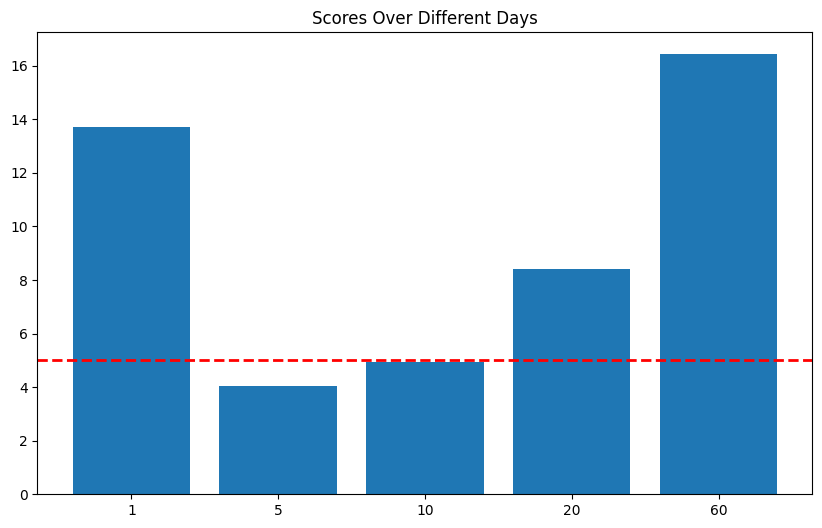

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(days,scores)
plt.title('Scores Over Different Days')
plt.axhline(y=5, color='red', linestyle='--', linewidth=2, label="Target Line")

plt.show()

# So we can say that we should use Vix as a future price predictor for comming 5 to 10 days.

### Now let's predict using model2

In [75]:
model2.predict([[80,10]])  # vixprice, vix change

C:\Users\ALIE-n-WARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.76728665])

# now let us categorise vix using K-means and find out on which group of vix values our model predicts best

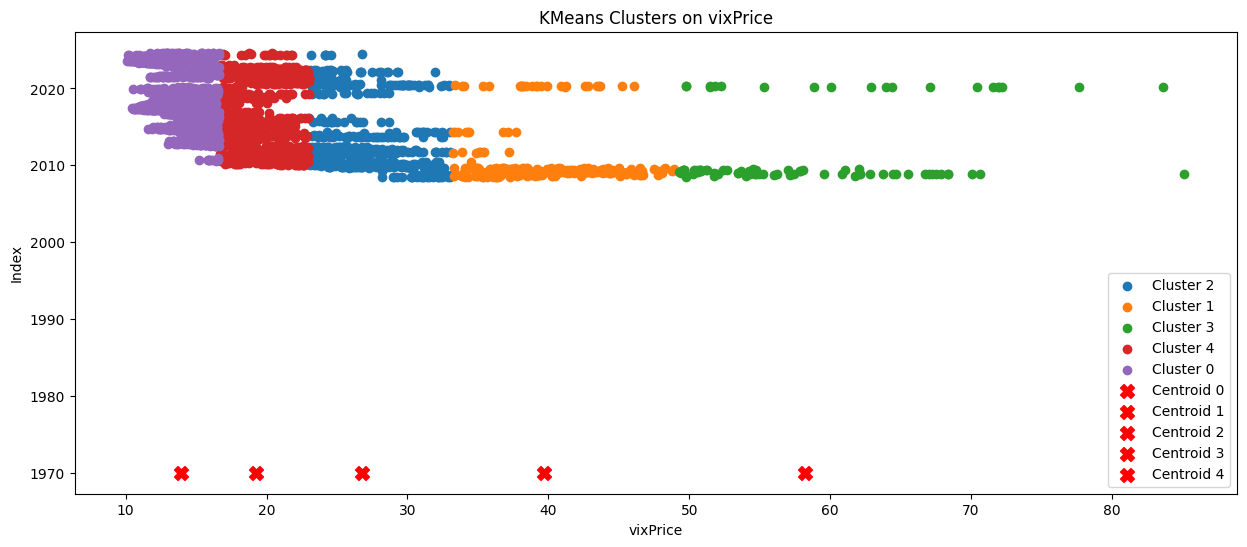

In [76]:
X = niftyvix[['vixPrice']]

kmeans = KMeans(n_clusters=5, random_state=0)
niftyvix['cluster'] = kmeans.fit_predict(X)

# Plotting the clusters with switched axes
plt.figure(figsize=(15, 6))
for cluster_num in niftyvix['cluster'].unique():
    cluster_data = niftyvix[niftyvix['cluster'] == cluster_num]
    plt.scatter(cluster_data['vixPrice'], cluster_data.index, label=f'Cluster {cluster_num}')

# Plot cluster centroids on the x-axis
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid, -1, marker='X', s=100, color='red', label=f'Centroid {i}')  # placing centroids at y=-1 for display

plt.ylabel('Index')
plt.xlabel('vixPrice')
plt.title('KMeans Clusters on vixPrice')
plt.legend()
plt.show()


In [77]:
cluster_ranges = niftyvix.groupby('cluster')['vixPrice'].agg(['min', 'max'])
print(cluster_ranges)

             min      max
cluster                  
0        10.1350  16.6100
1        33.2600  48.9500
2        23.0400  33.1200
3        49.2400  85.1300
4        16.6125  23.0275


# Let us test accurcy 5 day forward on each cluster

### cluster 1

In [78]:
filtered_data = niftyvix[(niftyvix['vixPrice'] > 10) & (niftyvix['vixPrice'] < 15.17)]

modelc1 = LinearRegression()
x=filtered_data[['vixPrice','vixChange%']]    
y=filtered_data['n5day%']  

modelc1.fit(x,y)
pred = modelc1.predict(x)
pred

print(np.square(y-pred).mean())
mc1score=np.square(y-pred).mean()


2.078616636831426


### Cluster 2

In [79]:
filtered_data = niftyvix[(niftyvix['vixPrice'] > 16.61) & (niftyvix['vixPrice'] < 23.02)]

modelc2 = LinearRegression()
x=filtered_data[['vixPrice','vixChange%']]    
y=filtered_data['n5day%']  

modelc2.fit(x,y)
pred = modelc2.predict(x)

print(np.square(y-pred).mean())
mc2score=np.square(y-pred).mean()

5.4166687683379715


### Cluster 3

In [80]:
filtered_data = niftyvix[(niftyvix['vixPrice'] > 23.02) & (niftyvix['vixPrice'] < 33.12)]

modelc3 = LinearRegression()
x=filtered_data[['vixPrice','vixChange%']]    
y=filtered_data['n5day%']  

modelc3.fit(x,y)
pred = modelc3.predict(x)

print(np.square(y-pred).mean())
mc3score=np.square(y-pred).mean()

10.348066767664836


### Cluster 4

In [81]:
filtered_data = niftyvix[(niftyvix['vixPrice'] > 33.2600) & (niftyvix['vixPrice'] < 48.9500)]  

modelc4 = LinearRegression()
x=filtered_data[['vixPrice','vixChange%']]    
y=filtered_data['n5day%']  

modelc3.fit(x,y)
pred = modelc3.predict(x)

print(np.square(y-pred).mean())
mc4score=np.square(y-pred).mean()

29.925768711726434


### Cluster 5

In [82]:

filtered_data = niftyvix[(niftyvix['vixPrice'] > 49.2400) & (niftyvix['vixPrice'] < 85.1300)]

modelc5 = LinearRegression()
x=filtered_data[['vixPrice','vixChange%']]    
y=filtered_data['n5day%']  

modelc5.fit(x,y)
pred = modelc5.predict(x)

print(r2_score(y, pred) * 100)
mc5score=r2_score(y, pred) * 100


19.237037228181673


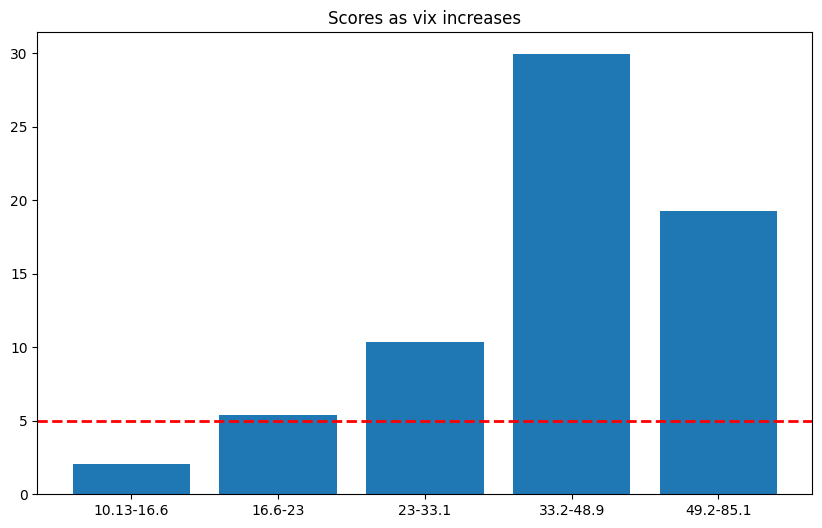

In [83]:
scores = [mc1score, mc2score,mc3score,mc4score,mc5score]
days = ["10.13-16.6","16.6-23","23-33.1","33.2-48.9","49.2-85.1"]
plt.figure(figsize=(10, 6))
plt.bar(days,scores)
plt.title('Scores as vix increases')
plt.axhline(y=5, color='red', linestyle='--', linewidth=2, label="Target Line")

plt.show()

# By observing bar graph above we can say that the model predicts best  when value of vix is below 23

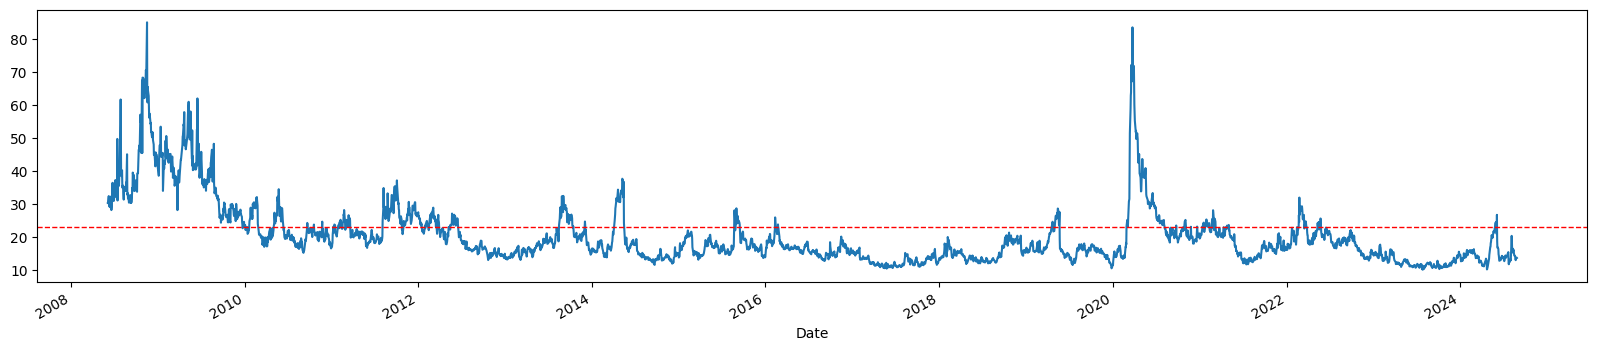

In [84]:
niftyvix['vixPrice'].plot(figsize=(20,4))
plt.axhline(y=23, color='red', linestyle='--', linewidth=1)